In [187]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#nltk.download('vader_lexicon')
pd.set_option('display.max_colwidth', None)
import spacy 
from nltk.tokenize import MWETokenizer, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Anu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [188]:
nlp= spacy.load('en_core_web_sm')


In [189]:
from spacy import displacy

In [7]:
#Import all tweets with their positive, negative, and neutral ratings 
tots_twts_sents= pd.read_csv("sentiment_tweets_cln.csv")


In [9]:
tots_twts_sents['new_text'] = tots_twts_sents['new_text'].apply(lambda x: x.replace('Beyond Meat','BYND'))
tots_twts_sents['new_text'] = tots_twts_sents['new_text'].apply(lambda x: x.replace('beyond meat','BYND'))
tots_twts_sents['new_text'] = tots_twts_sents['new_text'].apply(lambda x: x.replace('Beyond meat','BYND'))
tots_twts_sents['new_text'] = tots_twts_sents['new_text'].apply(lambda x: x.replace('Beyond','BYND'))
tots_twts_sents['new_text'] = tots_twts_sents['new_text'].apply(lambda x: x.replace('beyond','BYND'))                                                                
                                                               


In [10]:
#lets remove the urls and punctuation from these tweets before using spacy  
remove_url = lambda x: re.sub(r'^https?:\/\/.*[\r\n]*'," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x) 
tots_twts_sents["new_text"] = tots_twts_sents.new_text.map(remove_url).map(rt)



In [11]:
from spacy.symbols import amod

In [27]:
tots_twts_sents["new_text"] = tots_twts_sents['new_text'].apply(lambda x: x.replace('nuggets','nugget'))
tots_twts_sents["new_text"] = tots_twts_sents['new_text'].apply(lambda x: x.replace('Nuggets','nugget'))
tots_twts_sents["new_text"] = tots_twts_sents['new_text'].apply(lambda x: x.replace('Nugget','nugget'))



In [28]:
#Lets use spacy to pre process text for the countvectorizer and tfid 
#we should define Beyond Meat as an entity





In [29]:
#Lets clean the piped spacy_doc
docs_clean = [[w.lemma_.lower() for w in doc if (not w.is_stop and not w.is_punct and not w.like_num) \
               or (w.lemma_=='not')] for doc in cln_docs]
tots_twts_sents['docs_clean'] = docs_clean


In [150]:
tots_twts_sents.to_csv('corex_tweets.csv', index=False)

In [134]:
#First we will use TFID with lsa, then cv with nmf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfid = TfidfVectorizer(stop_words='english', max_df=0.7, min_df= .02)
X = tfid.fit_transform(docs_list_clean)
df_X = pd.DataFrame(X.toarray(), columns=tfid.get_feature_names())


In [135]:
df_X.head(10)

,actually,amp,bad,base,burger,chicken,don,eat,food,fried,...,rt,shit,taste,think,try,ve,vegan,vegetarian,venture,want
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.354506,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.250244,0.0,0.525196,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.628263,0.0,0.347821,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.406319,0.000000,...,0.000000,0.000000,0.380405,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.868774,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.728102,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.262974,0.0,0.000000,0.000000,0.000000,...,0.678052,0.000000,0.000000,0.0,0.484756,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.502766,0.742933,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.696721,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.785519,0.000000,0.000000,0.0,0.000000,0.000000,0.618837,0.0,0.0,0.0


In [123]:
from sklearn.decomposition import TruncatedSVD, NMF


In [136]:
#LSA 
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.05452233, 0.11837765, 0.07908628, 0.07190991])

In [137]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [138]:
display_topics(lsa, tfid.get_feature_names(), 12)


Topic  0
chicken, kfc, nugget, fry, fried, try, like, new, eat, vegan, plant, good

Topic  1
nugget, kfc, try, new, good, bad, actually, vegan, eat, review, taste, don

Topic  2
plant, base, meat, fried, burger, jerky, pepsico, new, vegan, launch, venture, joint

Topic  3
fried, kfc, chicken, try, vegan, know, think, rt, food, ve, actually, bad


In [95]:
#cv with nmf
cv_2 = CountVectorizer(stop_words = 'english', min_df = .02)
doc_word = cv_2.fit_transform(docs_list_clean)
df_x_2 = pd.DataFrame(doc_word.toarray(), columns=cv_2.get_feature_names())
df_x_2.head()

,actually,amp,bad,base,burger,bynd,chicken,don,eat,food,...,rt,shit,taste,think,try,ve,vegan,vegetarian,venture,want
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
num_topics = 5
topics = NMF(num_topics)
doc_topic = topics.fit_transform(df_x_2)

In [100]:
display_topics(topics, cv_2.get_feature_names(), 12)



Topic  0
bynd, eat, shit, good, burger, want, don, ve, amp, food, try, impossible

Topic  1
chicken, fry, fried, like, taste, look, think, vegan, eat, shit, plant, know

Topic  2
plant, base, pepsico, jerky, launch, joint, venture, meat, burger, new, vegan, food

Topic  3
kfc, try, vegan, new, meat, fried, rt, review, eat, know, food, think

Topic  4
nugget, like, good, taste, look, chicken, new, eat, actually, impossible, don, bad


In [162]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [105]:
#Lets try topic modeling on the beyond meat corpus
bynd_meat_twt = pd.read_csv("2nd_tweets.csv")

In [142]:
bynd_meat_twt["0"]

0       @sushimann83 Had a discussion about this the other night. Nonsensical that plant-based alternatives are always more… https://t.co/OWcghK9ZTb
1               Beyond Meat And Impossible Foods Helped Save Nearly 1 Million Animals In The US Last Year - Plant Based News https://t.co/a7i3fH4fz1
2                                            As someone who genuinely loves “fake meat” and especially Beyond Burgers… how could they do this to me…
3                                                  @bronzechairq656 @HHanoki @Billy_Purcell Beyond Meat says hold my beer... https://t.co/xOvo3IqiOI
4       Only decent vegan meat comes from Asian Buddhist places that what they've been doing for centuries. I've tried crap… https://t.co/tkrP274KwA
                                                                            ...                                                                     
2807                                                 KFC and Beyond Meat executives detail the launch of v

In [143]:
bynd_meat_twt["0"] = bynd_meat_twt["0"].apply(lambda x: x.replace('Beyond Meat','BYND'))
bynd_meat_twt["0"] = bynd_meat_twt["0"].apply(lambda x: x.replace('beyond meat','BYND'))
bynd_meat_twt["0"] = bynd_meat_twt["0"].apply(lambda x: x.replace('Beyond meat','BYND'))
#bynd_meat_twt["0"] = bynd_meat_twt["0"].apply(lambda x: x.replace('Beyond','BYND'))
#bynd_meat_twt["0"] = bynd_meat_twt["0"].apply(lambda x: x.replace('beyond','BYND'))                                                                
                                                               


In [144]:
#lets remove the urls and punctuation from these tweets before using spacy  
remove_url = lambda x: re.sub(r'^https?:\/\/.*[\r\n]*'," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x) 
bynd_meat_twt["0"] = bynd_meat_twt["0"].map(remove_url).map(rt)



In [145]:
cln_docs = list(nlp.pipe(bynd_meat_twt["0"]))

bynd_meat_twt['spacy_doc'] = cln_docs
bynd_meat_twt.head(10)


,0,spacy_doc
0,Had a discussion about this the other night Nonsensical that plant based alternatives are always more,"( , Had, a, discussion, about, this, the, other, night, , Nonsensical, that, plant, based, alternatives, are, always, more, )"
1,BYND And Impossible Foods Helped Save Nearly 1 Million Animals In The US Last Year Plant Based News,"(BYND, And, Impossible, Foods, Helped, Save, Nearly, 1, Million, Animals, In, The, US, Last, Year, , Plant, Based, News, )"
2,As someone who genuinely loves fake meat and especially Beyond Burgers how could they do this to me,"(As, someone, who, genuinely, loves, , fake, meat, , and, especially, Beyond, Burgers, , how, could, they, do, this, to, me)"
3,Purcell BYND says hold my beer,"( , Purcell, BYND, says, hold, my, beer, )"
4,Only decent vegan meat comes from Asian Buddhist places that what they ve been doing for centuries I ve tried crap,"(Only, decent, vegan, meat, comes, from, Asian, Buddhist, places, that, what, they, ve, been, doing, for, centuries, , I, ve, tried, crap, )"
5,Mika s favorite dish is meat loaf preferably with scratch cooked mashed potatoes and rolls Her ta,"( , Mika, s, favorite, dish, is, meat, loaf, , preferably, with, scratch, cooked, mashed, potatoes, and, rolls, , Her, ta, )"
6,Bet they have lots of BYND,"( , Bet, they, have, lots, of, BYND, )"
7,Made dinner w BYND w them,"(Made, dinner, w, BYND, w, them, )"
8,i ve tried the kfc BYND nuggets pretty mid 6 10,"(i, ve, tried, the, kfc, BYND, nuggets, , pretty, mid, 6, 10)"
9,scared to purchase the kfc BYND chicken in fear of the cashier laughing at me in response,"(scared, to, purchase, the, kfc, BYND, chicken, in, fear, of, the, cashier, laughing, at, me, in, response)"


In [154]:
#Lets clean the piped spacy_doc
docs_clean_1 = [[w.lemma_.lower() for w in doc if (not w.is_stop and not w.is_punct and not w.like_num) \
               or (w.lemma_=='not')] for doc in cln_docs]
bynd_meat_twt['docs_clean_1'] = docs_clean_1


In [146]:
# Install CorEx 
!pip install corextopic
!pip install networkx

In [155]:
bynd_meat_twt.head(5)
docs_list_clean = [' '.join(doc) for doc in docs_clean_1]
bynd_meat_twt['docs_list_clean'] = docs_list_clean


In [190]:
# Import other packages for examples
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
vectorizer = CountVectorizer(max_features=2500,
                             stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(bynd_meat_twt.docs_list_clean)
words = list(np.asarray(vectorizer.get_feature_names()))

In [157]:
doc_word.shape

(2812, 2500)

In [162]:
words[:20]

['able',
 'absolutely',
 'abuse',
 'accept',
 'acceptable',
 'accompany',
 'accord',
 'account',
 'act',
 'action',
 'actual',
 'actually',
 'ad',
 'add',
 'address',
 'adjust',
 'adopt',
 'advert',
 'advertise',
 'advertising']

In [158]:
topic_model = ct.Corex(n_hidden= 10, ### YOUR NUMBER OF TOPICS HERE
                       words=words,  ### YOUR VOCABULARY HERE
                       seed=1
                       )

topic_model.fit(doc_word,          ### YOUR DOCUMENT TERM MATRIX HERE
                words= words,      ### YOUR VOCABULARY HERE
                docs= bynd_meat_twt.docs_list_clean  ### YOUR DOCUMENT SERIES HERE
                );


In [159]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: short, seller, stock, shorted, tuck, company, russell, pile, index, bears
1: kfc, chicken, nugget, fry, fried, nuggets, nationwide, new, review, wing
2: foods, save, animals, year, impossible, nfts, sea, laundering, circlejerks, prediction
3: meat, bynd, fake, substitute, red, industry, use, alternative, diet, oil
4: plant, base, based, launch, current, volume, partner, directionally, bullish, benefit
5: nearly, help, jerky, pepsico, news, venture, joint, reportedly, locations, old
6: pizza, hut, sponsor, add, exclusive, sausage, italian, sauce, star, instead
7: fast, food, green, bean, black, soylent, cook, place, meal, spot
8: like, eat, don, look, want, shit, bad, feel, try, know
9: store, free, hear, uk, item, permanent, restaurant, friend, offer, pizzahut


In [175]:
topic_model = ct.Corex(n_hidden= 7, ### YOUR NUMBER OF TOPICS HERE
                       words=words,  ### YOUR VOCABULARY HERE
                       seed=1
                       )

topic_model.fit(doc_word,          ### YOUR DOCUMENT TERM MATRIX HERE
                words= words,      ### YOUR VOCABULARY HERE
                docs= bynd_meat_twt.docs_list_clean,  ### YOUR DOCUMENT SERIES HERE
                anchors=[
                         ['news', 'stock', "index","bullish"],
                         ['kfc', 'chicken', 'nugget', "new"],
                         ['review', 'bad', 'like', 'try', "feel"],
                         ['foods', 'save', 'animals', 'plant'],
                         ['pizzahut', 'pizzahut', 'pizza', 'hut']
                ],                  ### YOUR ANCHORS HERE
                anchor_strength=5   ### YOUR ANCHOR STRENGTH HERE
                );

In [176]:
topics = topic_model.get_topics()

for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: stock, news, index, russell, shorted, bullish, short, pile, company, bears
1: kfc, chicken, nugget, new, fried, fry, nuggets, nationwide, locations, nuggie
2: like, try, bad, feel, review, taste, look, ve, rubber, eraser
3: plant, save, foods, animals, base, based, pepsico, jerky, help, nearly
4: pizza, hut, pizzahut, sponsor, exclusive, canadian, add, crumbles, sausage, permanently
5: taco, bell, store, sauce, gets, sea, nfts, amp, laundering, prediction
6: meat, bynd, fake, seller, substitute, tuck, eat, don, fast, food


In [177]:
topic_colms = ['topic'+str(i) for i in range(topic_model.labels.shape[1])]

predictions = pd.DataFrame(topic_model.labels, columns=topic_colms)
predictions.head(5)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,False,False,False,True,False,False,True
1,True,False,False,True,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True


In [178]:
predictions.shape

(2812, 7)

In [179]:
finance = predictions['topic0'].sum()/len(predictions)
kfc_launch = predictions['topic1'].sum()/len(predictions)
reviews = predictions['topic2'].sum()/len(predictions)
environment = predictions['topic3'].sum()/len(predictions)
pizzahut = predictions['topic4'].sum()/len(predictions)
mystery = predictions['topic5'].sum()/len(predictions)
plnt_bsd_ind = predictions['topic6'].sum()/len(predictions)

In [180]:
print(finance, kfc_launch, reviews, environment, pizzahut, mystery, plnt_bsd_ind)

0.08179231863442389 0.20270270270270271 0.1852773826458037 0.11130867709815079 0.0430298719772404 0.18029871977240397 0.36237553342816503


In [181]:
topic_model.get_top_docs(topic=1, n_docs=2)

[('kfc bynd piece food', 0.0),
 ('livin crazy time    taco bell get wing kfc get bynd   s', 0.0)]

([<matplotlib.axis.XTick at 0x7fcdc272fa00>,
 [Text(0, 0, 'finance'),
  Text(1, 0, 'kfc_launch'),
  Text(2, 0, 'reviews'),
  Text(3, 0, 'environment'),
  Text(4, 0, 'pizzahut'),
  Text(5, 0, 'mystery'),
  Text(6, 0, 'plnt_bsd_ind')])

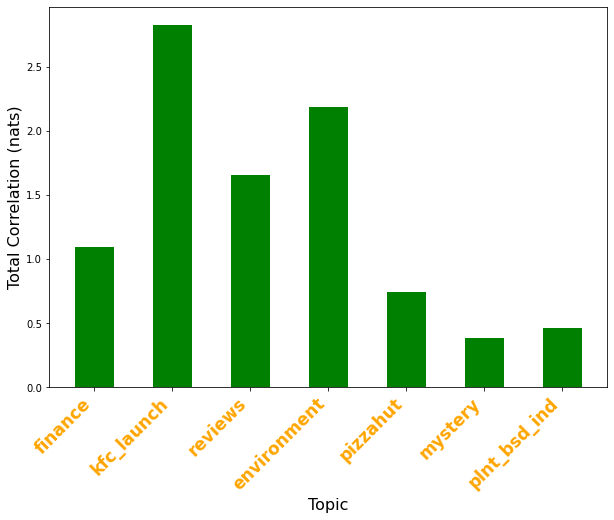

In [185]:
bars = ("finance", "kfc_launch", "reviews", "environment", "pizzahut", "mystery", "plnt_bsd_ind")
y_pos = range(topic_model.tcs.shape[0])
plt.figure(figsize=(10,7))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='green', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')


In [193]:
import scattertext as st

In [194]:
tots_twts_sents.head(5)

,date,text,number_of_likes,polarity,subjectivity,sentiment,neg,neu,pos,compound,new_text,spacy_doc,docs_clean
0,2022-01-20 06:41:01+00:00,19.1.2022\n7. KFC\nFans Joke KFC's New Plant-Based Nuggets Look Like 'Deep-Fried ...\nhttps://t.co/DjocL4VCyo,0,0.136364,0.454545,positive,0.000,0.719,0.281,0.5719,19 1 2022 7 KFC Fans Joke KFC s New Plant Based nugget Look Like Deep Fried,"(19, 1, 2022, 7, , KFC, Fans, Joke, KFC, s, New, Plant, Based, nugget, Look, Like, , Deep, Fried, )","[ , kfc, fans, joke, kfc, s, new, plant, based, nugget, look, like, , deep, fried, ]"
1,2022-01-20 06:32:07+00:00,So... the KFC beyond chicken looks like tofu... and I am borderline obsessed with tofu as someone who still eats me… https://t.co/hZSBsm5I4I,1,-0.550000,0.975000,positive,0.073,0.819,0.108,0.2023,So the KFC BYND chicken looks like tofu and I am borderline obsessed with tofu as someone who still eats me,"(So, , the, KFC, BYND, chicken, looks, like, tofu, , and, I, am, borderline, obsessed, with, tofu, as, someone, who, still, eats, me, )","[ , kfc, bynd, chicken, look, like, tofu, , borderline, obsess, tofu, eat, ]"
2,2022-01-20 06:29:01+00:00,KFC takes plant-based chicken from Beyond Meat nationwide - CNET: #DeepLearning #IoT #BigData MT: @MikeQuindazzi… https://t.co/UtzqnX39XE,0,-0.600000,0.950000,neutral,0.000,1.000,0.000,0.0000,KFC takes plant based chicken from BYND nationwide CNET DeepLearning IoT BigData MT,"(KFC, takes, plant, based, chicken, from, BYND, nationwide, , CNET, , DeepLearning, , IoT, , BigData, MT, )","[kfc, take, plant, base, chicken, bynd, nationwide, , cnet, , deeplearning, , iot, , bigdata, mt, ]"
3,2022-01-20 03:37:25+00:00,Kfc beyond meat nuggets are hella good (def expensive tho) like legit taste like any other fast food nugget,7,0.068750,0.568750,positive,0.000,0.661,0.339,0.8016,Kfc BYND nugget are hella good def expensive tho like legit taste like any other fast food nugget,"(Kfc, BYND, nugget, are, hella, good, , def, expensive, tho, , like, legit, taste, like, any, other, fast, food, nugget)","[kfc, bynd, nugget, hella, good, , def, expensive, tho, , like, legit, taste, like, fast, food, nugget]"
4,2022-01-20 02:42:00+00:00,"""It’s a Kentucky Fried Miracle,"" writes CJN Columnist Regina Brett. ""At least that’s what KFC and Beyond Meat are s… https://t.co/T2M9UaFeNP",1,-0.300000,0.400000,neutral,0.000,1.000,0.000,0.0000,It s a Kentucky Fried Miracle writes CJN Columnist Regina Brett At least that s what KFC and BYND are s,"( , It, s, a, Kentucky, Fried, Miracle, , writes, CJN, Columnist, Regina, Brett, , At, least, that, s, what, KFC, and, BYND, are, s, )","[ , s, kentucky, fried, miracle, , write, cjn, columnist, regina, brett, , s, kfc, bynd, s, ]"


In [195]:
corpus = st.CorpusFromPandas(tots_twts_sents,
                             category_col='sentiment',
                             text_col='new_text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [196]:
html = st.produce_scattertext_explorer(
        corpus,
        category='negative',
        category_name='Negative',
        not_category_name='Positive',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=tots_twts_sents['number_of_likes'],
        )

In [197]:
open('Beyond.html', 'wb').write(html.encode('utf-8'));